In [3]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.compose import make_column_transformer

########### mflow ############
import mlflow
import mlflow.sklearn
########### mflow ############

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sharelib import *
import logging
from pathlib import Path
import json
import glob
import sys

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [3]:
if __name__ == "__main__":
    df = pd.DataFrame()
    path_to_json = 'rawdata3' 
    json_pattern = os.path.join(path_to_json,'*.txt')
    file_list = glob.glob(json_pattern)
    
    xcount = 0

    for file in file_list:
        xcount = xcount + 1
        print("xcount: ", xcount)
        data = pd.read_json(file, lines=True)
        df = pd.concat([df,data], ignore_index = True)

xcount:  1


In [39]:
    # print(np.get_printoptions())
    # np.set_printoptions(threshold=sys.maxsize)
    # print(np.get_printoptions())

    # ads_country_dst
    # print("------------- ads_country_dst'].value_counts() ------------- ")    
    # print(df['ads_country_dst'].value_counts())    
    # print("------------- ads_country_dst'].value_counts() ------------- ")    
    # print(df.head())
    # print(df.columns)
    # print(df.shape)
    
    df_categories = pd.concat([df["ads_country_dst"]], axis=1, sort=False,)

    # print(df_categories.columns)
    # print(df_categories.shape)
    
    X_label = df_categories.apply(LabelEncoder().fit_transform)
    # print(X_label.value_counts()) 

    df["ads_country_dst2"] = 0
    
    X = pd.concat([X_label,df["ads_country_dst2"]], axis=1, sort=False,)
    
    print(X.columns)
    print(X.shape)
    print(X.value_counts())

Index(['ads_country_dst', 'ads_country_dst2'], dtype='object')
(10046, 2)
ads_country_dst  ads_country_dst2
0                0                   8436
28               0                    856
26               0                    206
5                0                    195
8                0                     77
19               0                     60
6                0                     44
1                0                     22
22               0                     22
16               0                     21
27               0                     14
10               0                     13
12               0                     12
7                0                     11
17               0                     10
25               0                      8
11               0                      6
4                0                      6
3                0                      6
13               0                      4
24               0                      4
15        

C:\Users\sutee.k\AppData\Local\Temp\ipykernel_14856\4156849466.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=None, cmap="flag", alpha=0.5)


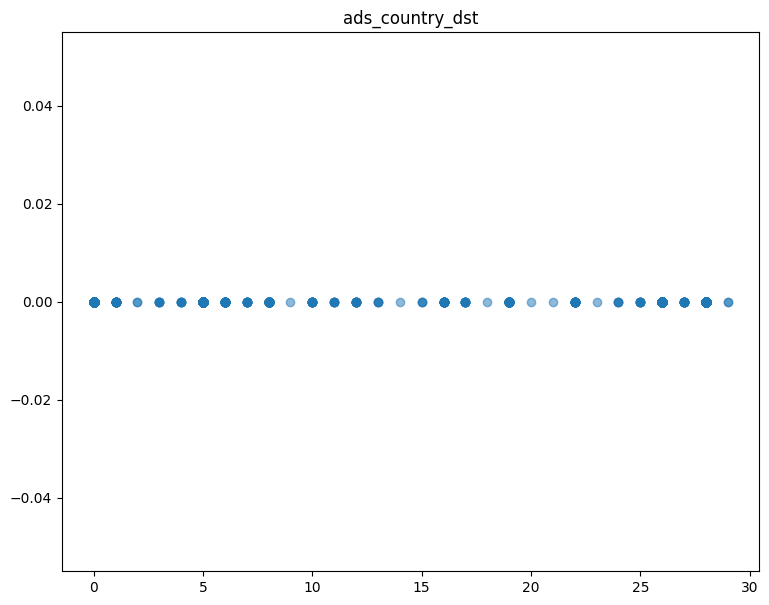

In [27]:
# Plot the data
plt.figure(figsize=(9,7))
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=None, cmap="flag", alpha=0.5)
plt.title("ads_country_dst")
plt.show()

In [40]:

print(X)
if_detector = IsolationForest(n_estimators=10, contamination=0.1).fit(X)
if_detect = if_detector.predict(X)
print(if_detect)


       ads_country_dst  ads_country_dst2
0                    0                 0
1                    0                 0
2                    0                 0
3                    0                 0
4                    0                 0
...                ...               ...
10041                0                 0
10042                0                 0
10043                0                 0
10044                0                 0
10045                0                 0

[10046 rows x 2 columns]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  

In [9]:
%set_env MLFLOW_TRACKING_URI=http://127.0.0.1:5000
tracking_uri = os.environ["MLFLOW_TRACKING_URI"]
# export MLFLOW_TRACKING_USERNAME=user 
# export MLFLOW_TRACKING_PASSWORD=pwd

experiment = mlflow.get_experiment_by_name('soc-ml-unsupervised-dest')
experiment_id = experiment.experiment_id

with mlflow.start_run(experiment_id=experiment_id):
    mlflow.set_tracking_uri(tracking_uri)
    
    print("Artifact Location: {}".format(experiment.artifact_location))
    print("artifact uri : " + mlflow.get_artifact_uri())

    mlflow.doctor()

    # mlflow.log_metric("score_trains", str(score_train))
    # mlflow.log_metric("score_test", str(score_test))
    mlflow.sklearn.log_model(if_detector, "model", registered_model_name="soc-ml")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

env: MLFLOW_TRACKING_URI=http://127.0.0.1:5000
Artifact Location: mlflow-artifacts:/891986704585588212
artifact uri : mlflow-artifacts:/891986704585588212/ad2144302710471aa5337deca46f6d84/artifacts
System information: Windows 10.0.19045
Python version: 3.9.7
MLflow version: 2.1.1
MLflow module location: C:\Users\sutee.k\AppData\Roaming\Python\Python39\site-packages\mlflow\__init__.py
Tracking URI: http://127.0.0.1:5000
Registry URI: http://127.0.0.1:5000
Active experiment ID: 891986704585588212
Active run ID: ad2144302710471aa5337deca46f6d84
Active run artifact URI: mlflow-artifacts:/891986704585588212/ad2144302710471aa5337deca46f6d84/artifacts
MLflow environment variables: 
  MLFLOW_TRACKING_URI: http://127.0.0.1:5000
MLflow dependencies: 
  Flask: 2.3.3
  Jinja2: 3.1.2
  alembic: 1.12.0
  click: 8.1.7
  cloudpickle: 2.2.1
  databricks-cli: 0.17.8
  docker: 6.1.3
  entrypoints: 0.4
  gitpython: 3.1.37
  importlib-metadata: 5.2.0
  markdown: 3.4.4
  matplotlib: 3.8.0
  numpy: 1.25.2
  

Registered model 'soc-ml' already exists. Creating a new version of this model...
2023/09/30 18:05:16 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: soc-ml, version 3
Created version '3' of model 'soc-ml'.


Model saved in run ad2144302710471aa5337deca46f6d84


In [10]:
!python --version

Python 3.9.7


In [11]:
%%bash
netstat -tulpn | grep LISTEN
ps -ef

(Not all processes could be identified, non-owned process info
 will not be shown, you would have to be root to see it all.)


tcp        0      0 127.0.0.1:5000          0.0.0.0:*               LISTEN      262/python3.9       


your 131072x1 screen size is bogus. expect trouble


UID        PID  PPID  C STIME TTY          TIME CMD
root         1     0  0 07:00 ?        00:00:01 /init
root         9     1  0 07:00 ?        00:00:00 /init
root        10     9  0 07:00 ?        00:00:00 /init
sutee       11    10  0 07:00 pts/0    00:00:02 -bash
root       170     1  0 07:08 ?        00:00:00 /init
root       171   170  0 07:08 ?        00:00:00 /init
sutee      172   171  0 07:08 pts/1    00:00:00 -bash
sutee      246   172  0 15:37 pts/1    00:00:04 /usr/bin/python3.9 /home/sutee/.local/bin/mlflow ui
sutee      262   246  0 15:37 pts/1    00:00:02 /usr/bin/python3.9 /home/sutee/.local/bin/gunicorn -b 127.0.0.1:5000 -w 4 mlflow.server:app
sutee      263   262  0 15:37 pts/1    00:00:05 /usr/bin/python3.9 /home/sutee/.local/bin/gunicorn -b 127.0.0.1:5000 -w 4 mlflow.server:app
sutee      264   262  0 15:37 pts/1    00:00:06 /usr/bin/python3.9 /home/sutee/.local/bin/gunicorn -b 127.0.0.1:5000 -w 4 mlflow.server:app
sutee      265   262  0 15:37 pts/1    00:00:05 /u

In [14]:
!mlflow models serve -m mlflow-artifacts:/891986704585588212/2bc9f20203c34cd2a46054a3ff21815f/artifacts/model -p 1236 --no-conda

^C


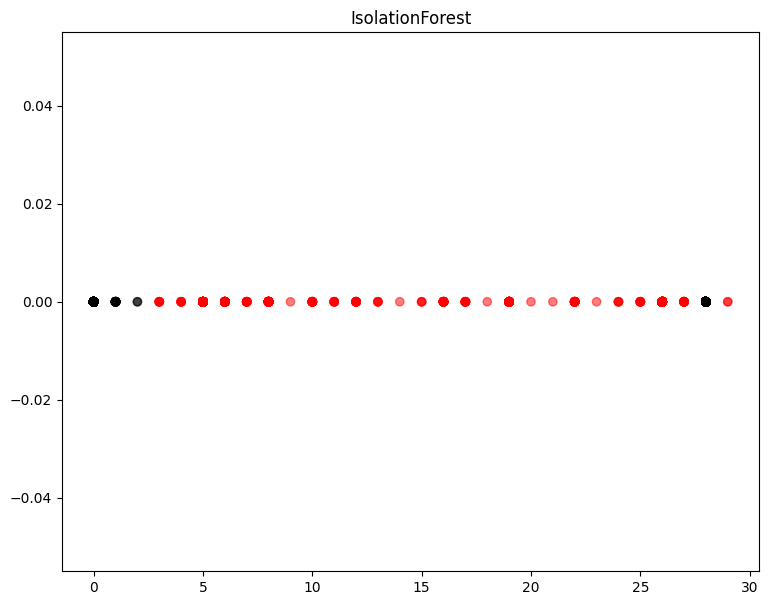

In [41]:
# Plot the data
plt.figure(figsize=(9,7))
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=if_detect, cmap="flag", alpha=0.5)
plt.title("IsolationForest")
plt.show()

In [43]:
# Call and fit the Local Outlier Factor detector

lof_detector = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
lof_detect = lof_detector.fit_predict(X.to_numpy())
print(lof_detect)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

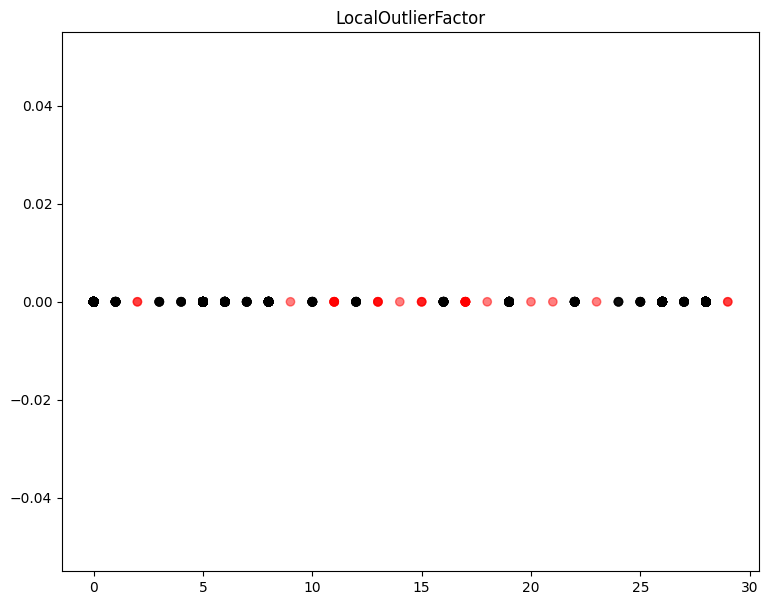

In [44]:
plt.figure(figsize=(9,7))
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=lof_detect, cmap="flag", alpha=0.5)
plt.title("LocalOutlierFactor")
plt.show()

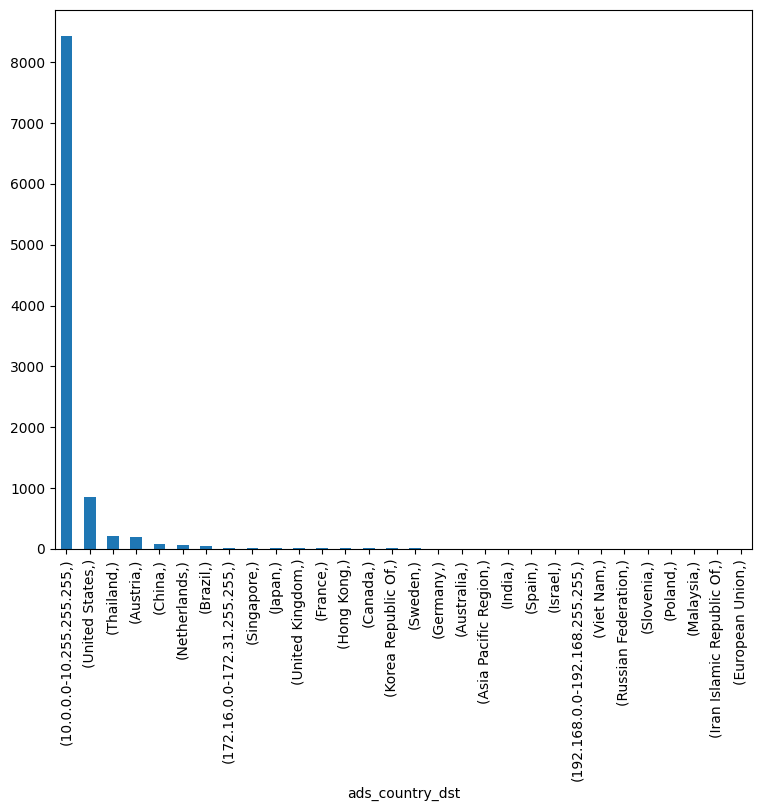

In [62]:
# Plot the conparison between actual and predicted y
df_categories.value_counts().plot(kind="bar", figsize=(9,7))
plt.show()

In [55]:
# Call and fit the One Class SVM detector

X_new = np.array([[0 ,0],[1 ,0],[2 ,0],[3 ,0],[4 ,0],[5 ,0],[6 ,0],[7 ,0],[8 ,0],[9 ,0],[10 ,0],[11 ,0],[12 ,0],[13 ,0],[14 ,0],[15 ,0],[16 ,0],[17 ,0],
                  [18, 0],[19 ,0],[20 ,0],[21 ,0],[22 ,0],[23 ,0],[24 ,0],[25 ,0],[26 ,0],[27 ,0],[28 ,0],[29 ,0]])

svm_detector = OneClassSVM(tol=0.3, nu=0.1, gamma=0.1).fit(X.to_numpy())
print(svm_detector)
svm_detect = svm_detector.predict(X_new)
print(svm_detect)

OneClassSVM(gamma=0.1, nu=0.1, tol=0.3)
[ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1]
